In [1]:
#import libraries
import pandas as pd
import numpy as np
import itertools
import networkx as nx
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
pd.options.mode.chained_assignment = None 
sns.set(font='Times New Roman')
sns.set(font_scale=1.5)

In [2]:
data = pd.read_csv("variant_surveillance.tsv", sep = '\t',dtype = {'Variant': 'string',
                                                                 'Is reference?': 'string',
                                                                 'Is complete?': 'string'})
data.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
3,EPI_ISL_3578085,betacoronavirus,GK,B.1.617.2,PLEARN-v1.8,"(N_D377Y,M_I82T,Spike_D950N,N_R203M,NSP12_G671...",VOC Delta GK (B.1.617.2+AY.*) first detected i...,2021-08-18,Europe / Turkey,Human,2021-08-23,<NA>,True,True,NaN,0.000101,0.379853,29754
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe / Germany / North Rhine-Westphalia,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729


In [3]:
data.iloc[0,6]

'VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa'

In [4]:
data.isnull().sum()

Accession ID                0
Type                       19
Clade                      95
Pango lineage               1
Pangolin version         3086
AA Substitutions         9412
Variant               1257084
Collection date             0
Location                    0
Host                        0
Submission date             0
Is reference?        11389720
Is complete?           185122
Is high coverage?     5844948
Is low coverage?     10487581
N-Content             4379279
GC-Content                  2
Sequence length             0
dtype: int64

In [5]:
data.shape

(11389721, 18)

In [6]:
data.columns

Index(['Accession ID', 'Type', 'Clade', 'Pango lineage', 'Pangolin version',
       'AA Substitutions', 'Variant', 'Collection date', 'Location', 'Host',
       'Submission date', 'Is reference?', 'Is complete?', 'Is high coverage?',
       'Is low coverage?', 'N-Content', 'GC-Content', 'Sequence length'],
      dtype='object')

In [7]:
data = data[data['Variant'].notna()]
data.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
3,EPI_ISL_3578085,betacoronavirus,GK,B.1.617.2,PLEARN-v1.8,"(N_D377Y,M_I82T,Spike_D950N,N_R203M,NSP12_G671...",VOC Delta GK (B.1.617.2+AY.*) first detected i...,2021-08-18,Europe / Turkey,Human,2021-08-23,<NA>,True,True,NaN,0.000101,0.379853,29754
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",VOC Omicron GRA (B.1.1.529+BA.*) first detecte...,2022-01-17,Europe / Germany / North Rhine-Westphalia,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729


In [8]:
data['Location'].unique().tolist()[:25]

['Oceania / Australia / Australian Capital Territory',
 'Europe / Turkey',
 'Europe / Germany / North Rhine-Westphalia',
 'North America / USA / Minnesota',
 'North America / USA / Texas',
 'North America / USA / Massachusetts',
 'Europe / United Kingdom / Wales',
 'Europe / United Kingdom / England',
 'Europe / United Kingdom / Scotland',
 'North America / USA / Ohio',
 'Europe / France / Occitanie / Nimes',
 'North America / USA / Florida',
 'North America / USA / California / Alameda County',
 "Europe / France / Provence-Alpes-Cote d'Azur / Marseille",
 'North America / USA / Texas / Midland',
 'North America / USA / Texas / Houston',
 'Europe / France / Occitanie / Nîmes',
 'North America / USA / Arkansas',
 'North America / USA / Colorado',
 'North America / USA / Rhode Island',
 'Europe / Germany / Baden-Wurttemberg',
 'Europe / France / Centre Val de Loire / Vierzon',
 'Europe / Luxembourg',
 'Asia / India / Gujarat / Surat',
 'Europe / Germany / Rhineland-Palatinate']

In [9]:
data['Variant'].unique().tolist()

['VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa',
 'VOC Delta GK (B.1.617.2+AY.*) first detected in India',
 'VOC Alpha GRY (B.1.1.7+Q.*) first detected in the UK',
 'VOI Epsilon GH/452R.V1 (B.1.429+B.1.427) first detected in USA/California',
 'VOI Lambda GR/452Q.V1 (C.37+C.37.1) first detected in Peru',
 'VOI Iota GH/253G.V1 (B.1.526) first detected in USA/New York',
 'VOC Beta GH/501Y.V2 (B.1.351+B.1.351.2+B.1.351.3) first detected in South Africa',
 'VOI Kappa G/452R.V3 (B.1.617.1) first detected in India',
 'VOI Mu GH (B.1.621+B.1.621.1) first detected in Colombia',
 'VOC Gamma GR/501Y.V3 (P.1+P.1.*) first detected in Brazil/Japan',
 'VOI Eta G/484K.V3 (B.1.525) first detected in UK/Nigeria',
 'VUM GH/490R (B.1.640+B.1.640.*) first detected in Congo/France',
 'VOI Zeta GR/484K.V2 (P.2) first detected in Brazil',
 'VOI Theta GR/1092K.V1 (P.3) first detected in the Philippines']

In [10]:
#specify strings for countries 

vocs_who = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron','Epsilon','Lambda','Iota','Kappa','Mu','Eta','Zeta','Theta']

for i in vocs_who:
    
    data.loc[data['Variant'].str.contains(i), 'Variant'] = i




In [11]:
data = data[data['Variant'].isin(['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron','Epsilon','Lambda','Iota','Kappa','Mu','Eta','Zeta','Theta'])] 
data.shape

(10131719, 18)

In [12]:
#specify strings for countries 

# europe_list = ['Turkey', 'Germany', 'United Kingdom','Brazil','Israel', 'Denmark','Spain','Italy','Ireland','Cuba','Canada','Belgium','Sweden',
#               'South Korea','USA','France','Japan','Austria','Netherlands','Switzerland','Ireland','Poland','Mexico','Luxembourg']

%time
europe_list = ["Europe", "North America"]
              
for i in europe_list:
    
    data.loc[data['Location'].str.contains(i), 'Location'] = i


#data.loc[data['Location'].str.contains('Turkey'), 'Location'] = 'Turkey'

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 15 µs


In [13]:
data.head()

,Accession ID,Type,Clade,Pango lineage,Pangolin version,AA Substitutions,Variant,Collection date,Location,Host,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content,Sequence length
0,EPI_ISL_10010236,betacoronavirus,GRA,BA.1.17,PANGO-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",Omicron,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,NaN,0.379635,29747
1,EPI_ISL_10010227,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",Omicron,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.009446,0.379794,29747
2,EPI_ISL_10010232,betacoronavirus,GRA,BA.1.17,PLEARN-v1.8,"(NSP5_P132H,Spike_H69del,Spike_T95I,Spike_A67V...",Omicron,2022-01-25,Oceania / Australia / Australian Capital Terri...,Human,2022-02-17,<NA>,True,NaN,NaN,0.000134,0.379585,29747
3,EPI_ISL_3578085,betacoronavirus,GK,B.1.617.2,PLEARN-v1.8,"(N_D377Y,M_I82T,Spike_D950N,N_R203M,NSP12_G671...",Delta,2021-08-18,Europe,Human,2021-08-23,<NA>,True,True,NaN,0.000101,0.379853,29754
4,EPI_ISL_10299251,betacoronavirus,GRA,BA.1,PLEARN-v1.8,"(NSP5_P132H,Spike_T95I,Spike_A67V,Spike_K417N,...",Omicron,2022-01-17,Europe,Human,2022-02-24,<NA>,True,NaN,NaN,0.048908,0.380371,29729


In [14]:
data[data['Variant']=='Alpha']['Submission date'].unique()

array(['2021-02-08', '2021-03-18', '2021-06-09', '2021-03-15',
       '2021-06-29', '2021-05-05', '2021-04-29', '2021-06-30',
       '2021-04-19', '2021-05-17', '2021-06-17', '2021-09-01',
       '2021-08-31', '2021-07-05', '2021-05-19', '2021-09-03',
       '2021-04-06', '2021-06-07', '2021-04-12', '2021-05-20',
       '2021-03-01', '2021-05-15', '2021-08-11', '2021-06-05',
       '2021-05-06', '2021-06-08', '2021-05-18', '2021-08-12',
       '2021-04-21', '2021-04-22', '2021-06-23', '2021-01-26',
       '2021-03-12', '2021-11-17', '2021-09-29', '2021-09-27',
       '2021-10-20', '2021-07-01', '2021-02-01', '2021-06-06',
       '2021-06-25', '2021-05-08', '2021-06-15', '2021-07-08',
       '2021-08-25', '2021-06-14', '2021-06-20', '2022-04-20',
       '2021-05-31', '2021-05-13', '2021-03-09', '2021-03-16',
       '2021-07-04', '2021-03-19', '2021-07-23', '2021-05-12',
       '2021-08-01', '2021-03-29', '2021-05-14', '2021-04-30',
       '2021-07-30', '2021-05-11', '2021-05-28', '2021-

In [15]:
data['Variant'].unique()

<StringArray>
['Omicron',   'Delta',   'Alpha', 'Epsilon',  'Lambda',    'Iota',    'Beta',
   'Kappa',      'Mu',   'Gamma',     'Eta',    'Zeta',   'Theta']
Length: 13, dtype: string

In [16]:
df = data[['Variant','Location','Collection date']]
df.head()

,Variant,Location,Collection date
0,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
1,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
2,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
3,Delta,Europe,2021-08-18
4,Omicron,Europe,2022-01-17


In [17]:
df['Collection date'] = pd.to_datetime(df["Collection date"])
df.head()

,Variant,Location,Collection date
0,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
1,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
2,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25
3,Delta,Europe,2021-08-18
4,Omicron,Europe,2022-01-17


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10131719 entries, 0 to 11389720
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Variant          string        
 1   Location         object        
 2   Collection date  datetime64[ns]
dtypes: datetime64[ns](1), object(1), string(1)
memory usage: 309.2+ MB


In [19]:
df['Date']= df['Collection date'].dt.to_period('W')
df.head()

,Variant,Location,Collection date,Date
0,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25,2022-01-24/2022-01-30
1,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25,2022-01-24/2022-01-30
2,Omicron,Oceania / Australia / Australian Capital Terri...,2022-01-25,2022-01-24/2022-01-30
3,Delta,Europe,2021-08-18,2021-08-16/2021-08-22
4,Omicron,Europe,2022-01-17,2022-01-17/2022-01-23


In [20]:
df_weekly = df[(df['Collection date'] >= '2020-01-01') & (df['Collection date'] <='2022-05-31')].groupby(['Variant','Location', 'Date']).size().reset_index()
df_weekly.head()

,Variant,Location,Date,0
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1


In [21]:
df_weekly['Date'] = df_weekly['Date'].astype(str)
df_weekly.head()

,Variant,Location,Date,0
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1


In [22]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85450 entries, 0 to 85449
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Variant   85450 non-null  string
 1   Location  85450 non-null  object
 2   Date      85450 non-null  object
 3   0         85450 non-null  int64 
dtypes: int64(1), object(2), string(1)
memory usage: 2.6+ MB


In [23]:
df_weekly.columns = ['Variant','Location','Date','Freq']
df_weekly.head()

,Variant,Location,Date,Freq
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1


In [24]:
tmp = df_weekly['Date'].str.split(pat = '/', expand = True)
tmp.head()

,0,1
0,2021-02-15,2021-02-21
1,2021-04-12,2021-04-18
2,2021-04-26,2021-05-02
3,2021-05-03,2021-05-09
4,2021-05-10,2021-05-16


In [25]:
df_weekly2 = pd.merge(df_weekly, tmp.iloc[: , 0], left_index= True, right_index= True)
df_weekly2.head()

,Variant,Location,Date,Freq,0
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1,2021-02-15
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1,2021-04-12
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4,2021-04-26
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2,2021-05-03
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1,2021-05-10


In [26]:
df_weekly2.Variant.unique()

<StringArray>
[  'Alpha',    'Beta',   'Delta', 'Epsilon',     'Eta',   'Gamma',    'Iota',
   'Kappa',  'Lambda',      'Mu', 'Omicron',   'Theta',    'Zeta']
Length: 13, dtype: string

In [27]:
df_weekly2.columns = ['Variant', 'Location', 'WY-str', 'Freq', 'Date']
df_weekly2.head()

,Variant,Location,WY-str,Freq,Date
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1,2021-02-15
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1,2021-04-12
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4,2021-04-26
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2,2021-05-03
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1,2021-05-10


In [28]:
df_weekly2['Date'] = pd.to_datetime(df_weekly2['Date'])
df_weekly2.head()

,Variant,Location,WY-str,Freq,Date
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1,2021-02-15
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1,2021-04-12
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4,2021-04-26
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2,2021-05-03
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1,2021-05-10


In [29]:
df_weekly2.sort_values(by = 'Date')
df_weekly2.head()

,Variant,Location,WY-str,Freq,Date
0,Alpha,Africa / Algeria / Algiers,2021-02-15/2021-02-21,1,2021-02-15
1,Alpha,Africa / Algeria / Algiers,2021-04-12/2021-04-18,1,2021-04-12
2,Alpha,Africa / Algeria / Algiers,2021-04-26/2021-05-02,4,2021-04-26
3,Alpha,Africa / Algeria / Algiers,2021-05-03/2021-05-09,2,2021-05-03
4,Alpha,Africa / Algeria / Algiers,2021-05-10/2021-05-16,1,2021-05-10


In [30]:
#claculate weekly sums

df_weekly_sum = df_weekly.groupby(['Variant', 'Date', 'Location'], as_index= False)['Freq'].sum()
df_weekly_sum.head()

,Variant,Date,Location,Freq
0,Alpha,2019-12-30/2020-01-05,Africa / South Africa / Gauteng,1
1,Alpha,2019-12-30/2020-01-05,Asia / India / Kerala,5
2,Alpha,2019-12-30/2020-01-05,Asia / India / Tamil Nadu,1
3,Alpha,2019-12-30/2020-01-05,Asia / Japan,2
4,Alpha,2019-12-30/2020-01-05,Europe,629


In [31]:
df_weekly_sum.shape

(85450, 4)

In [32]:
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Epsilon']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Lambda']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Iota']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Kappa']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Mu']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Eta']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Zeta']
df_weekly_sum = df_weekly_sum[df_weekly_sum['Variant'] != 'Theta']
df_weekly_sum.head(), df_weekly_sum['Variant'].unique()

(  Variant                   Date                         Location  Freq
 0   Alpha  2019-12-30/2020-01-05  Africa / South Africa / Gauteng     1
 1   Alpha  2019-12-30/2020-01-05            Asia / India / Kerala     5
 2   Alpha  2019-12-30/2020-01-05        Asia / India / Tamil Nadu     1
 3   Alpha  2019-12-30/2020-01-05                     Asia / Japan     2
 4   Alpha  2019-12-30/2020-01-05                           Europe   629,
 <StringArray>
 ['Alpha', 'Beta', 'Delta', 'Gamma', 'Omicron']
 Length: 5, dtype: string)

In [41]:
#clades contains all GISAID clades, VOC contains GISAID clades containing VOCs
#change clade input to whichever you want to analyze
clades = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omicron','Epsilon','Lambda','Iota','Kappa','Mu','Eta','Zeta','Theta']
VOC = ['Omicron', 'Delta', 'Gamma', 'Beta', 'Alpha']

clade_input = VOC    ####

#function to generate distance matrix based on quarter, year, and continent
def create_distance_matrix(df,quarter_continent):
    tmp = df['Variant'].str.split('vs', expand=True)
    clade_list = tmp[0].unique()
    distance_matrix = pd.DataFrame(index = clade_list)
    distance_matrix[clade_list] = np.nan
    #fill in distance matrix
    for i in clade_list:
        for j in clade_list:
            if i == j:
                distance_matrix.loc[i,j] = 0
            else:
                distance_matrix.loc[i,j] = (abs((df.loc[df['Variant'] == '{a}vs{b}'.format(a=i,b=j),
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Variant'] == '{a}vs{b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
                distance_matrix.loc[j,i] = (abs((df.loc[df['Variant'] == '{a}vs{b}'.format(a=i,b=j), 
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Variant'] == '{a}vs{b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
    return distance_matrix

#function to generate difference matrix based on quarter, year, and continent
def create_difference_matrix(df,quarter_continent):
    tmp = df['Variant'].str.split('vs', expand=True)
    clade_list = tmp[0].unique()
    difference_matrix = pd.DataFrame(index = clade_list)
    difference_matrix[clade_list] = np.nan
    #fill in difference matrix
    for i in clade_list:
        for j in clade_list:
            if i == j:
                difference_matrix.loc[i,j] = 0
            else:
                difference_matrix.loc[i,j] = (abs((df.loc[df['Variant'] == '{a}vs{b}'.format(a=i,b=j),
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Variant'] == '{a}vs{b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
                difference_matrix.loc[j,i] = (abs((df.loc[df['Variant'] == '{a}vs{b}'.format(a=i,b=j), 
                                                        quarter_continent].iloc[0] + 
                                            df.loc[df['Variant'] == '{a}vs{b}'.format(a=i,b=j), 
                                                   quarter_continent].iloc[0])/2))
    #if row_vs_col is a negative value, make it negative in difference matrix
    for i,v in difference_matrix.iterrows():
        for j in difference_matrix:
            if i != j:
                if (df.loc[df['Variant'] == '{a}vs{b}'.format(a=i,b=j),quarter_continent].iloc[0]) < 0:
                    difference_matrix.loc[i,j] *= -1
    return difference_matrix

#function to calculate the log transformed ratio of two clades
def transform_ratio(clade_1, clade_2):
    return np.log10(clade_1/clade_2)

def time_frame(df,time_window):  #original
    dataframe = df.loc[df['Collection date'].isin(time_window)]
    dataframe.iloc[:,2:] = dataframe.iloc[:,2:].cumsum()
    for i in dataframe.columns.tolist():
        if dataframe[i].isnull().all():
            dataframe = dataframe.drop(i, axis=1)
    return dataframe


def time_frame_no_cumsum(df,time_window):
    dataframe = df.loc[df['Collection date'].isin(time_window)]
    return dataframe

#function returns slope of clade advantage plots
def slope_calc(day, pairwise_fitness):
    par = np.polyfit(day, pairwise_fitness, 1, full = True)
    slope= par[0][0]
    return slope

def clade_comparisons(df):
    clade_list = [i for i in clade_input if i in df.columns.tolist()]
    df['date_ordinal'] = pd.to_datetime(df['Date']).apply(lambda date: date.toordinal())
    df['days'] = df['date_ordinal'] - 737425
    #calculate log ratio for each clade comparison
    for i in clade_list:
        for j in clade_list:
            if i != j:
                df['{a}vs{b}'.format(a=i,b=j)] = df.apply(lambda row : 
                                                                        transform_ratio(row['{a}'.format(a=i)],
                                                                                        row['{b}'.format(b=j)]),
                                                                                        axis = 1)
    clade_list.append('date_ordinal')
    df = df.drop(clade_list, axis=1)
    return df

In [42]:
df_weekly_sum.head()

,Variant,Date,Location,Freq
0,Alpha,2019-12-30/2020-01-05,Africa / South Africa / Gauteng,1
1,Alpha,2019-12-30/2020-01-05,Asia / India / Kerala,5
2,Alpha,2019-12-30/2020-01-05,Asia / India / Tamil Nadu,1
3,Alpha,2019-12-30/2020-01-05,Asia / Japan,2
4,Alpha,2019-12-30/2020-01-05,Europe,629


In [43]:
# This function finds the distance matrix among all the clades 

def automation_mine(country,dataset):
    
    df_weekly = dataset[dataset['Location'] == country]
    

    #pivot dataframe so that index is date and columns are clades
    df_weekly = df_weekly.pivot(index = 'Date', columns = 'Variant', values = 'Freq')
    df_weekly = df_weekly.reset_index()
    

    df_weekly['Collection date'] = np.random.randint(1,6,df_weekly.shape[0])

    #split date column so we can retrieve month and year
    tmp = df_weekly['Date'].str.rsplit('-',n=3, expand = True)
    tmp.columns = ['0','1','2','3']

    #collection date column contains month and year of each week 
    df_weekly['Collection date'] = tmp['0']
    cols = df_weekly.columns.tolist()
    cols = cols[0:1] + cols[-1:] + cols[1:-1]
    df_weekly = df_weekly[cols]
    print(f"df_weekly : \n {df_weekly.head}")
    print(f"df_weekly : \n {df_weekly.columns}")
           
    #specify time frame to analyze
    df_sum = time_frame(df_weekly,['2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05'])
    # df_sum.to_csv(country+"df_sum"+r'.csv')
#     print(df_sum)
    #calculate log comparisons at each week
    df_ = clade_comparisons(df_sum)
#     print(df_)
    # df_.to_csv(country+'_clade_comparison')
    df_['days'] -= df_['days'].iloc[0]
    #print(df_)
    

    #calculate slopes, have to disregard nans
    df_slopes = pd.DataFrame()
    cols = df_.columns.to_list()
    df_slopes['Variant'] = cols[3:]
    #print(df_slopes['Clade'])
    slopes = []
    for i,v in enumerate(df_.iloc[:,3:]):
        tmp = df_[~df_.iloc[:,i+3].isnull()]
        tmp['pseudo_time'] = np.array(range(0, tmp.shape[0] ))*7
#         print(tmp)
        slopes.append(slope_calc(tmp.iloc[0:len(tmp),len(tmp.columns) - 1], tmp.iloc[0:len(tmp),i+3]))
        #print(len(slopes))
        #print(df_slopes)
    df_slopes['Slope'] = slopes
    # df_slopes.to_csv(country+"_slope_WHO"+r'.csv')
#     print(df_slopes)
    
    dist_mat = create_distance_matrix(df_slopes,'Slope')
    # dist_mat.to_csv(country+"_dist_mat_WHO"+r'.csv')
    print(f"distance matrix :\n {dist_mat}")
    
    dif_mat = create_difference_matrix(df_slopes,'Slope')
    # dif_mat.to_csv(country+"_dif_mat_WHO"+r'.csv')
    # print(f"difference matrix :\n {dif_mat}")

    #Plot distance matrix as clustermap
    sns.set(rc = {'figure.figsize':(10, 20)}, font_scale = 1.8)

    #create distance array from distance matrix
    distance_array = ssd.squareform(dist_mat) 

    #create linkage object
    distance_linkage = hierarchy.linkage(distance_array)

    #display clustermap
    g = sns.clustermap(dif_mat, row_linkage=distance_linkage, col_linkage=distance_linkage,
                        cmap = 'coolwarm',vmin=-.023,vmax=0.023, cbar_pos=(0.971, 0.087, .03, 0.7))                     
    # g.fig.set_size_inches(10, 10)
    # plt.savefig(country+"_clustermap_WHO"+'.jpg', dpi = 300, bbox_inches='tight')
    return g

df_weekly : 
 <bound method NDFrame.head of Variant        Date            Collection date  Alpha            \
0        2019-12-30/2020-01-05         2019-12            629.0   
1        2020-02-03/2020-02-09         2020-02              1.0   
2        2020-02-24/2020-03-01         2020-02              1.0   
3        2020-03-09/2020-03-15         2020-03              3.0   
4        2020-03-16/2020-03-22         2020-03              2.0   
..                         ...             ...              ...   
104      2022-05-02/2022-05-08         2022-05              1.0   
105      2022-05-09/2022-05-15         2022-05              NaN   
106      2022-05-16/2022-05-22         2022-05              NaN   
107      2022-05-23/2022-05-29         2022-05              NaN   
108      2022-05-30/2022-06-05         2022-05              NaN   

Variant  Beta             Delta            Gamma            Omicron          
0                    6.0              1.0              1.0              N

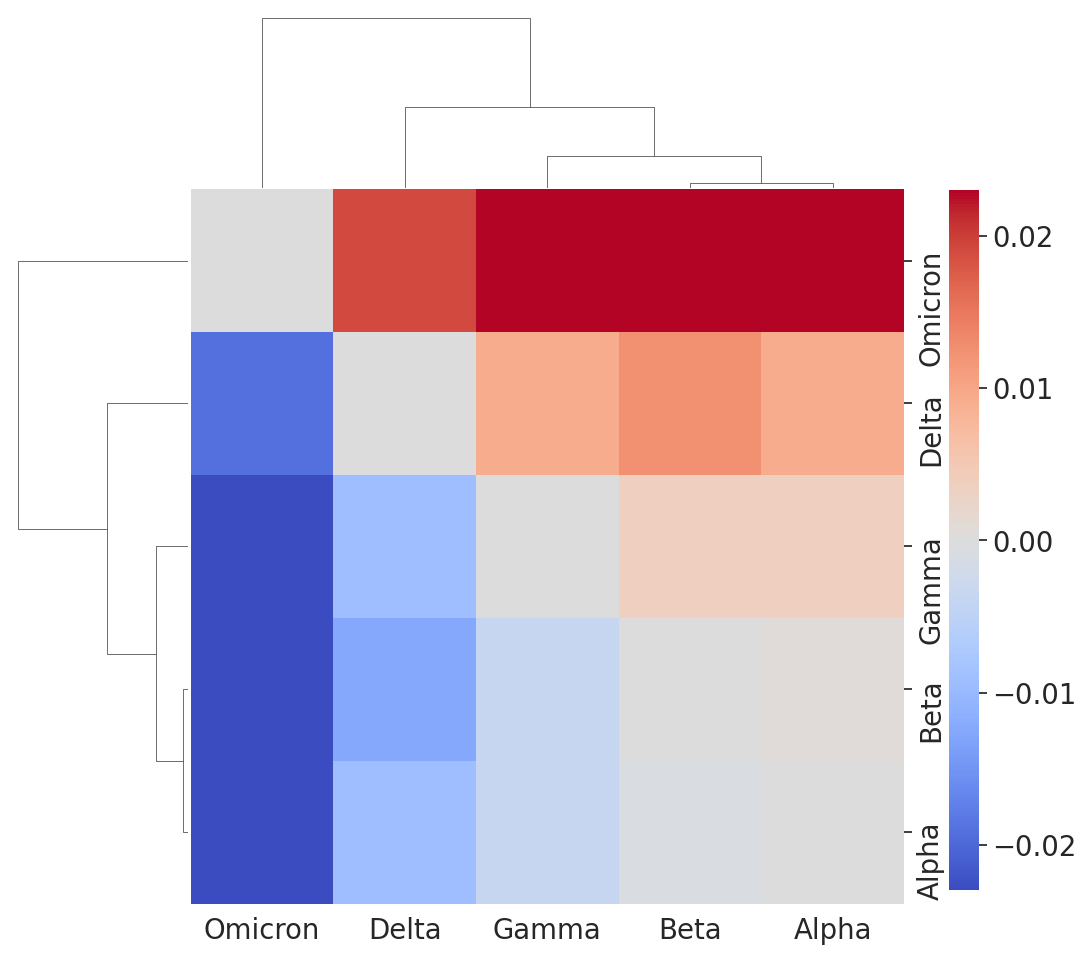

In [44]:
#automation function finds the diatance matrix
automation_mine('Europe', df_weekly_sum)

In [112]:
#automation function finds the diatance matrix
# automation_mine('Brazil', df_weekly_sum)

In [113]:
# automation_mine("Turkey", df_weekly_sum)

In [114]:
# automation_mine('Germany', df_weekly_sum)

In [115]:
# automation_mine('Denmark', df_weekly_sum)

In [116]:
# automation_mine('Italy', df_weekly_sum)

In [117]:
# automation_mine('Sweden', df_weekly_sum)

In [118]:
# automation_mine('South Korea', df_weekly_sum)

## Continent wise covid peak

In [173]:
# This function finds the distance matrix among all the clades 

def automation_mine(country,dataset):
    
    df_weekly = dataset[dataset['Location'] == country]
    

    #pivot dataframe so that index is date and columns are clades
    df_weekly = df_weekly.pivot(index = 'Date', columns = 'Variant', values = 'Freq')
    df_weekly = df_weekly.reset_index()
    

    df_weekly['Collection date'] = np.random.randint(1,6,df_weekly.shape[0])

    #split date column so we can retrieve month and year
    tmp = df_weekly['Date'].str.rsplit('-',n=3, expand = True)
    tmp.columns = ['0','1','2','3']

    #collection date column contains month and year of each week 
    df_weekly['Collection date'] = tmp['0']
    cols = df_weekly.columns.tolist()
    cols = cols[0:1] + cols[-1:] + cols[1:-1]
    df_weekly = df_weekly[cols]
           
    #specify time frame to analyze
    df_sum = time_frame(df_weekly,['2022-03','2022-04','2022-05'])
#     df_sum.to_csv(r'df_sum.csv')
    print(df_sum)
    #calculate log comparisons at each week
    df_ = clade_comparisons(df_sum)
    print(df_)
    # df_.to_csv(country+'_clade_comparison')
    df_['days'] -= df_['days'].iloc[0]
    #print(df_)
 

    #scatterplot of omicron BA.1 lineage fitness
    sns.set_style("darkgrid")
    sns.set(rc = {'figure.figsize':(15,8)})
    pango_compare = ['Omicron', 'Delta']#, 'Gamma', 'Beta', 'Alpha']
    marker = ['.', '+', 'v', 'x','*']
    legend=[]
    c=0

    for i in pango_compare:
        if i != 'Omicron': #and i!='Alpha' and i != 'Gamma':# and i!='Delta' and i!='Beta':
            
            mask = ~np.isnan(df_['days']) & ~np.isnan(df_['Omicronvs{0}'.format(i)])
            slope, intercept, r_value, p_value, std_err = stats.linregress(df_['days'][mask],df_['Omicronvs{0}'.format(i)][mask])
            print('test')
            print(slope)
            print(intercept)
            sns.regplot(x=df_['days'], y=df_['Omicronvs{0}'.format(i)], marker=marker[c],scatter_kws={'s':50},label='Omicronvs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept))
            # legend.append('BA.5 vs {0}: y={1:.1e}x+{2:.1f}'.format(i, slope, intercept))
        c+=1
    plt.legend(loc='upper left')
    plt.ylabel(r'$\log_{10}\left(\frac{\mathrm{Variant\ 1}}{\mathrm{Variant\ 2}}\right)$')
    plt.title(f'Omicron vs Other variants \n March 2022 - May 2022 \n Location : {country}')
    # plt.savefig(country+"_slope"+'.png')






#     #calculate slopes, have to disregard nans
#     df_slopes = pd.DataFrame()
#     cols = df_.columns.to_list()
#     df_slopes['Variant'] = cols[3:]
#     #print(df_slopes['Clade'])
#     slopes = []
#     for i,v in enumerate(df_.iloc[:,3:]):
#         tmp = df_[~df_.iloc[:,i+3].isnull()]
#         tmp['pseudo_time'] = np.array(range(0, tmp.shape[0] ))*7
#         print(tmp)
#         slopes.append(slope_calc(tmp.iloc[0:len(tmp),len(tmp.columns) - 1], tmp.iloc[0:len(tmp),i+3]))
#         #print(len(slopes))
#         #print(df_slopes)
#     df_slopes['Slope'] = slopes
#     # df_slopes.to_csv(country+"_slope_WHO"+r'.csv')
#     print(df_slopes)
    
#     dist_mat = create_distance_matrix(df_slopes,'Slope')
#     # dist_mat.to_csv(country+"_dist_mat_WHO"+r'.csv')
#     print(dist_mat)
    
#     dif_mat = create_difference_matrix(df_slopes,'Slope')
#     # dif_mat.to_csv(country+"_dif_mat_WHO"+r'.csv')
#     print(dif_mat)

#     #Plot distance matrix as clustermap
#     sns.set(rc = {'figure.figsize':(5, 5)}, font_scale = 1.5)

#     #create distance array from distance matrix
#     distance_array = ssd.squareform(dist_mat) 

#     #create linkage object
#     distance_linkage = hierarchy.linkage(distance_array)

#     #display clustermap

#     h = sns.heatmap(dif_mat, annot= True)                        
#     # g.fig.set_size_inches(10, 10)
#     # plt.savefig(country+"_clustermap_WHO"+'.jpg', dpi = 300, bbox_inches='tight')
#     return h

Variant        Date            Collection date  Alpha            \
97       2022-03-07/2022-03-13         2022-03              1.0   
98       2022-03-14/2022-03-20         2022-03              2.0   
99       2022-03-21/2022-03-27         2022-03              NaN   
100      2022-03-28/2022-04-03         2022-03              NaN   
101      2022-04-04/2022-04-10         2022-04              NaN   
102      2022-04-11/2022-04-17         2022-04              NaN   
103      2022-04-18/2022-04-24         2022-04              NaN   
104      2022-04-25/2022-05-01         2022-04              3.0   
105      2022-05-02/2022-05-08         2022-05              NaN   
106      2022-05-09/2022-05-15         2022-05              NaN   
107      2022-05-16/2022-05-22         2022-05              NaN   
108      2022-05-23/2022-05-29         2022-05              NaN   
109      2022-05-30/2022-06-05         2022-05              NaN   

Variant  Delta            Omicron          
97               

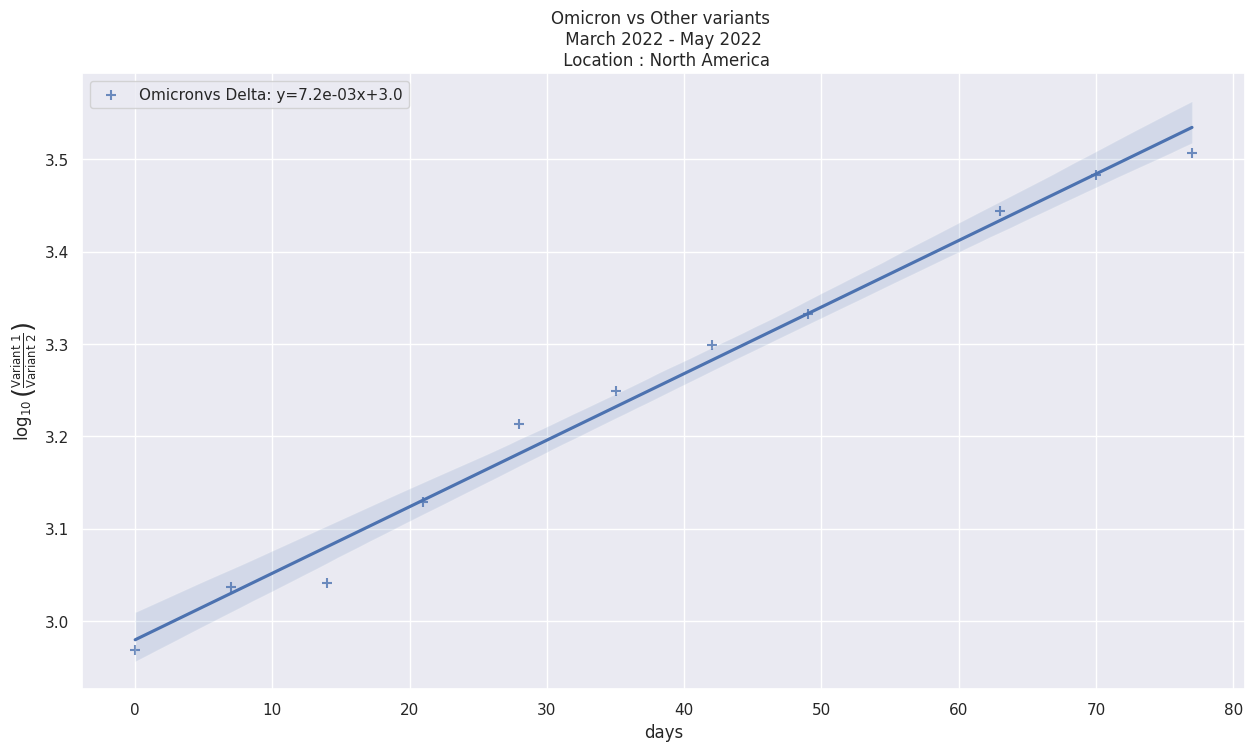

In [174]:
automation_mine('North America', df_weekly_sum)

Variant        Date            Collection date  Alpha            \
96       2022-03-07/2022-03-13         2022-03              2.0   
97       2022-03-14/2022-03-20         2022-03              NaN   
98       2022-03-21/2022-03-27         2022-03              3.0   
99       2022-03-28/2022-04-03         2022-03              4.0   
100      2022-04-04/2022-04-10         2022-04              NaN   
101      2022-04-11/2022-04-17         2022-04              NaN   
102      2022-04-18/2022-04-24         2022-04              NaN   
103      2022-04-25/2022-05-01         2022-04              NaN   
104      2022-05-02/2022-05-08         2022-05              5.0   
105      2022-05-09/2022-05-15         2022-05              NaN   
106      2022-05-16/2022-05-22         2022-05              NaN   
107      2022-05-23/2022-05-29         2022-05              NaN   
108      2022-05-30/2022-06-05         2022-05              NaN   

Variant  Beta             Delta            Omicron          


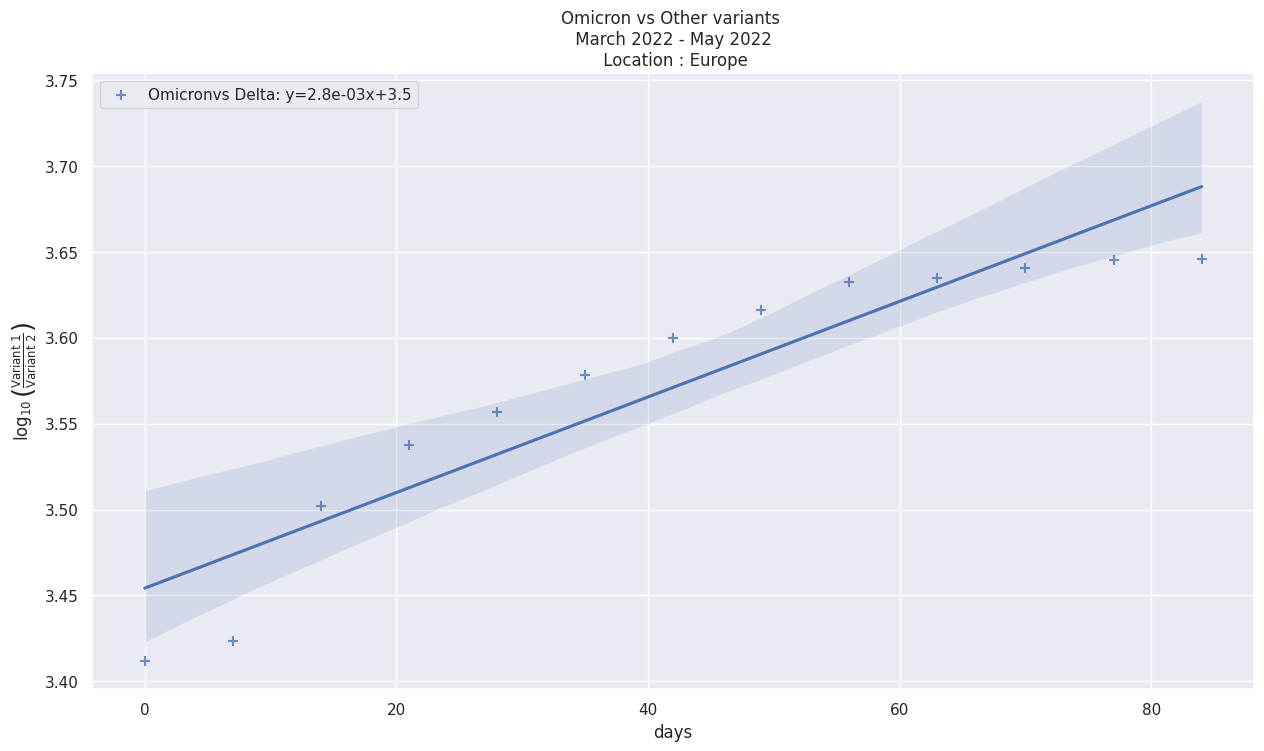

In [175]:
automation_mine('Europe', df_weekly_sum)

## Scatterplot
